<a href="https://colab.research.google.com/github/hitanshu5/EDA/blob/main/FlightEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
train_df = pd.read_excel('/content/Flight_train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [67]:
test_df = pd.read_excel('/content/Flight_test.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [68]:
final_df = pd.concat([train_df,test_df])
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [69]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [70]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.7+ MB


In [71]:
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [72]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [73]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019


In [74]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]
final_df['Arrival_Time']

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [75]:
final_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1 stop,In-flight meal not included,11087.0,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1 stop,No info,22270.0,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1 stop,In-flight meal not included,11087.0,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,5,2019


In [76]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [77]:
final_df['Arrival Hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival Min']=final_df['Arrival_Time'].str.split(':').str[1]
final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [78]:
final_df['Arrival Hour']=final_df['Arrival Hour'].astype(int)
final_df['Arrival Min']=final_df['Arrival Min'].astype(int)

In [79]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
 12  Arrival Hour     13354 non-null  int64  
 13  Arrival Min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.0+ MB


In [80]:
final_df['Dep_Hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_Min']=final_df['Dep_Time'].str.split(':').str[1]
final_df.drop('Dep_Time',axis=1,inplace=True)
final_df['Dep_Hour']=final_df['Dep_Hour'].astype(int)
final_df['Dep_Min']=final_df['Dep_Min'].astype(int)
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [81]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival Hour     13354 non-null  int64  
 12  Arrival Min      13354 non-null  int64  
 13  Dep_Hour         13354 non-null  int64  
 14  Dep_Min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 2.1+ MB


In [82]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [83]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [84]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [85]:
final_df.drop('Route',axis=1,inplace=True)
final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20


In [86]:
final_df['Duration_Hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [87]:
final_df[final_df['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [88]:
##there are duration of 5m in the data which doesnt make sense so we delete them
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [89]:
final_df['Duration_Hour']=final_df['Duration_Hour'].astype(int)

In [90]:
final_df['Duration_Min']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
final_df['Duration_Min']

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration_Min, Length: 13351, dtype: object

In [91]:
final_df[final_df['Duration_Min'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
18,Air India,Delhi,Cochin,23h,2.0,No info,13381.0,12,6,2019,19,15,20,15,23,NaN
33,Jet Airways,Delhi,Cochin,22h,2.0,In-flight meal not included,10919.0,15,6,2019,12,35,14,35,22,NaN
44,Multiple carriers,Delhi,Cochin,12h,1.0,No info,13062.0,21,3,2019,21,0,9,0,12,NaN
53,IndiGo,Banglore,Delhi,3h,0.0,No info,3943.0,18,6,2019,0,15,21,15,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,Air India,Delhi,Cochin,3h,0.0,No info,NaN,27,3,2019,17,10,14,10,3,NaN
2598,Jet Airways,Delhi,Cochin,11h,1.0,No info,NaN,9,6,2019,19,0,8,0,11,NaN
2604,Multiple carriers,Delhi,Cochin,10h,1.0,No info,NaN,12,6,2019,19,15,9,15,10,NaN
2607,Multiple carriers,Delhi,Cochin,13h,1.0,No info,NaN,3,3,2019,21,0,8,0,13,NaN


In [92]:
# Replace null values with 0 in the 'Duration_Min' column
final_df['Duration_Min'].fillna(0, inplace=True)

In [93]:
final_df['Duration_Min']=final_df['Duration_Min'].astype(int)

In [94]:
final_df['Total_Duration']=(final_df['Duration_Hour']*60)+final_df['Duration_Min']
final_df.drop(['Duration','Duration_Hour','Duration_Min'],axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,285


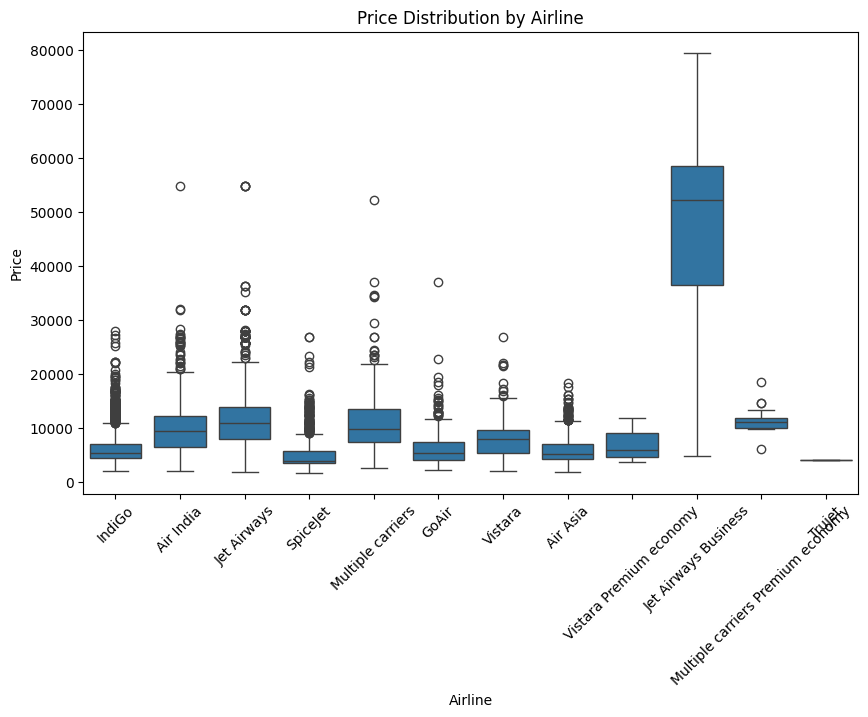

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Airline', y='Price', data=final_df)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.show()

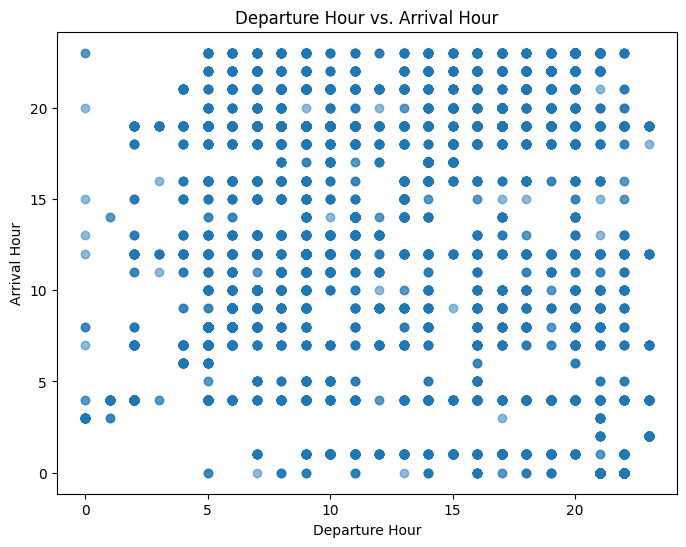

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['Dep_Hour'], final_df['Arrival Hour'], alpha=0.5)
plt.title('Departure Hour vs. Arrival Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Arrival Hour')
plt.show()

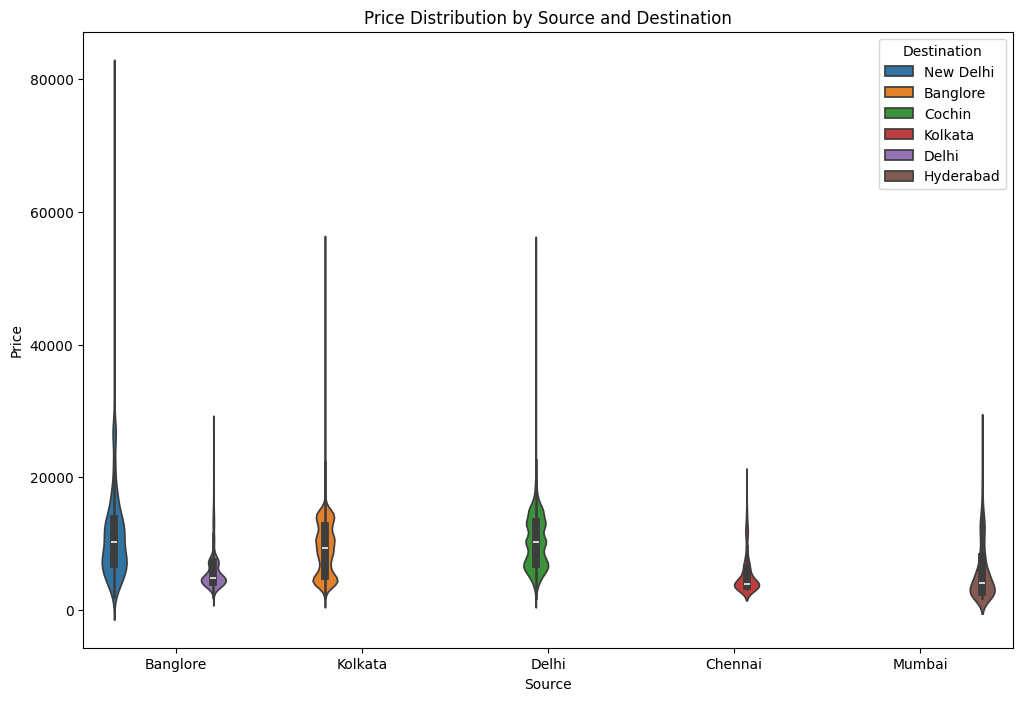

In [102]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Source', y='Price', hue='Destination', data=final_df)
plt.title('Price Distribution by Source and Destination')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

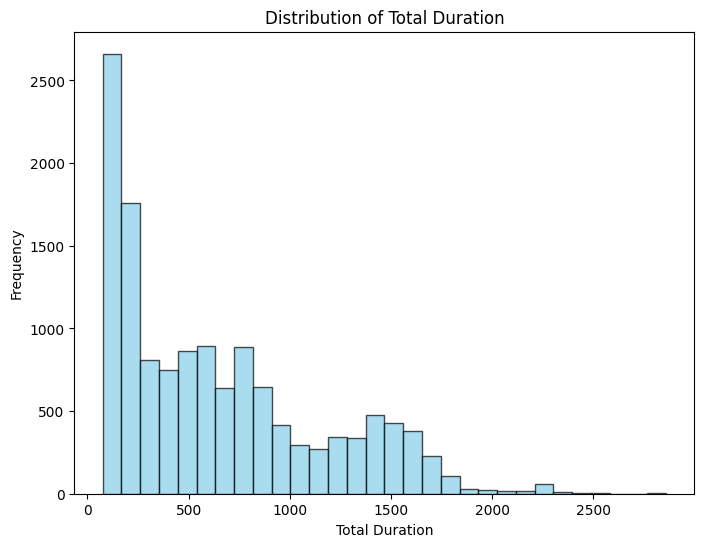

In [105]:
plt.figure(figsize=(8, 6))
plt.hist(final_df['Total_Duration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Duration')
plt.xlabel('Total Duration')
plt.ylabel('Frequency')
plt.show()


In [106]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [107]:
final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival Hour,Arrival Min,Dep_Hour,Dep_Min,Total_Duration
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,285


<Axes: >

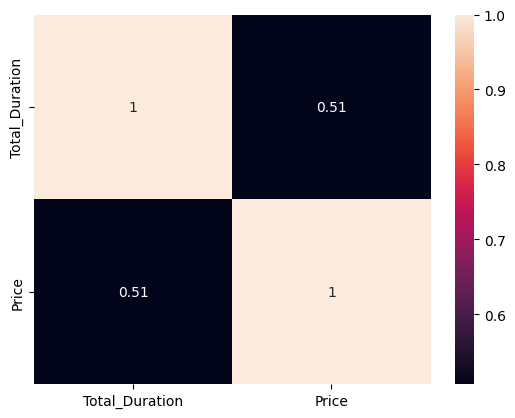

In [108]:
corr = final_df[['Total_Duration','Price']].corr()
sns.heatmap(corr,annot=True)